[Download Dataset](http://www.iainpardoe.com/teaching/dsc433/data/Churn.xls)



# Research Questions:
 #### 1. Whats the distribution of our cutomers (duration wise)?
 #### 2. Is there any correlation between churn and Intl. plan?
 #### 3. Is there any relationship between International minutes and customer service calls ?
 #### 4. Is there any relationship between Account Length and customer service calls ?
 #### 5. What relevant questions do you want to add ?

In [4]:
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel('Churn.xls')

df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Each row is a subscribing telephone customer, each column describes the attributes of the subscription.

#### Attributes:

 - State : Code of the States in USA.
 - Account Length : Duration of the account.
 - Area Code : Area code of the subscriber.
 - Int'l Plan : Subscribed to international plan.
 - VMail Plan : Subscribed to voice mail plan.
 - VMail Message : Number of voice mail messages.
 - Day Mins : Number of calling minutes during day.
 - Day Calls : Number of calls during day.
 - Day Charge : Charges during day.
 - Eve Mins : Number of calling minutes during evening.
 - Eve Calls : Number of calls during evening.
 - Eve Charge : Charges during evening.
 - Night Mins : Number of calling minutes during night.
 - Night Calls : Number of calls during night.
 - Night Charge : Charges during night.
 - Intl Mins : Number of international calling minutes.
 - Intl Calls : Number of international calls.
 - Intl Charge : Charges from international calls.
 - CustServ Calls : Customer service calls made.
 - Churn? : Churned, yes or no!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [8]:
print(df['Account Length'].min())
print(df['Account Length'].max())

1
243


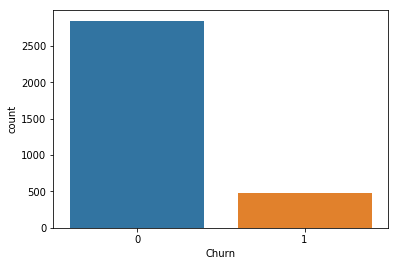

In [9]:
se.countplot(x= 'Churn', data =df)

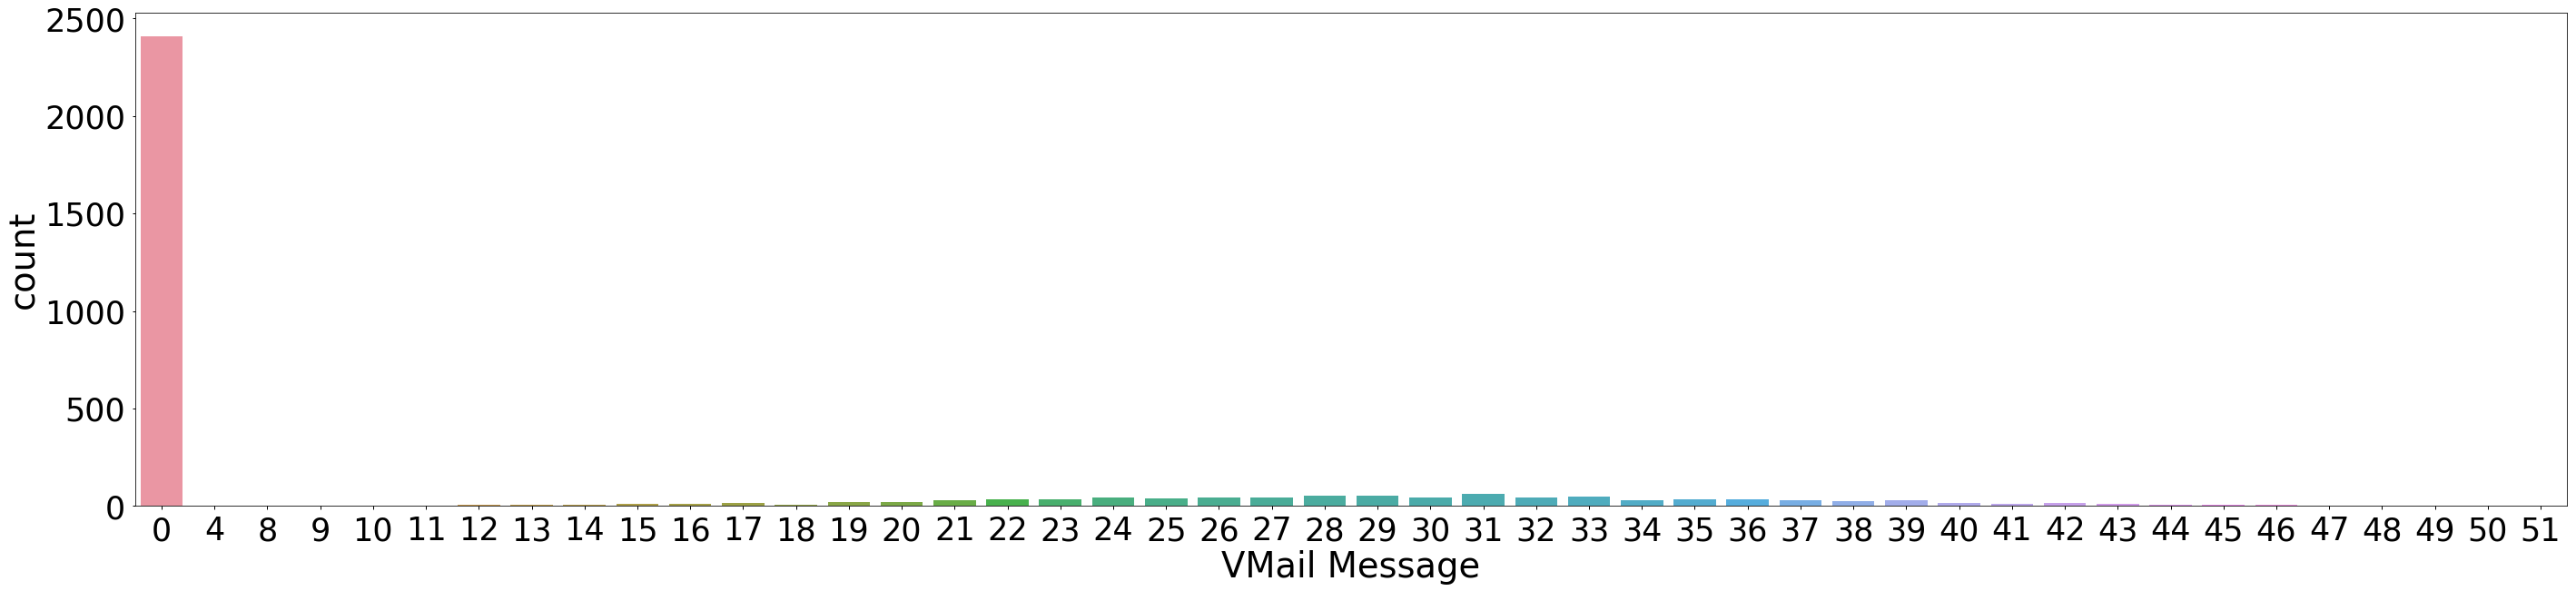

In [13]:
plt.figure(figsize=(48, 10))
se.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 2.5})
se.countplot(x= 'VMail Message', data =df)

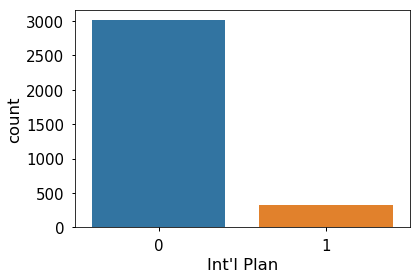

In [15]:
se.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
se.countplot(x = 'Int\'l Plan', data = df)

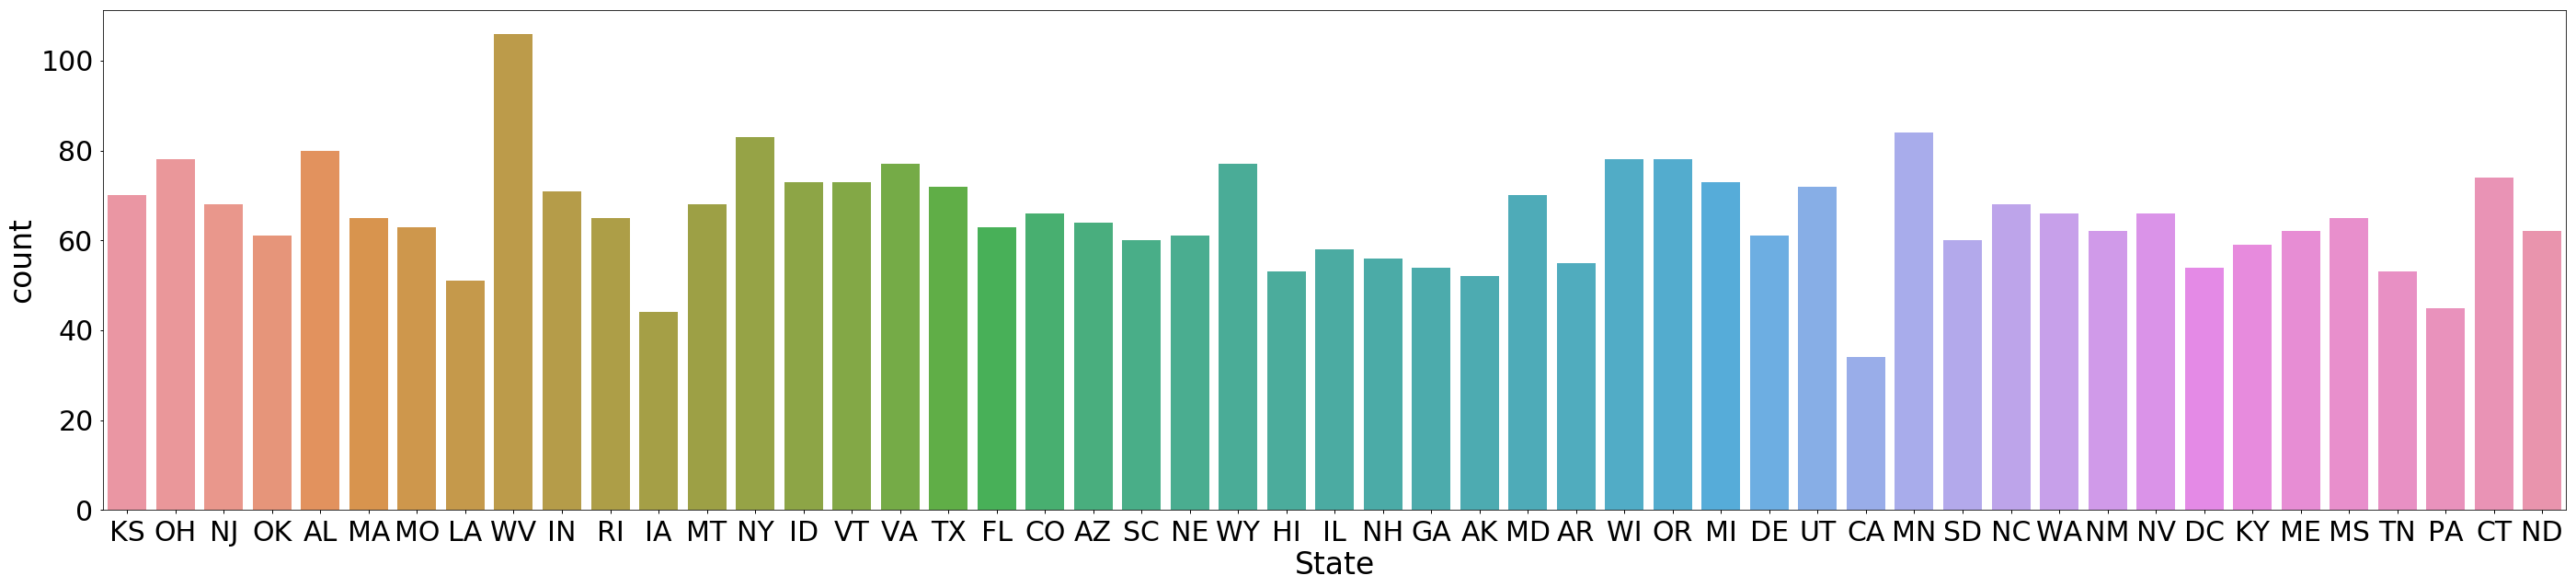

In [18]:
plt.figure(figsize=(48, 10))
se.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
se.countplot(x = 'State', data = df)

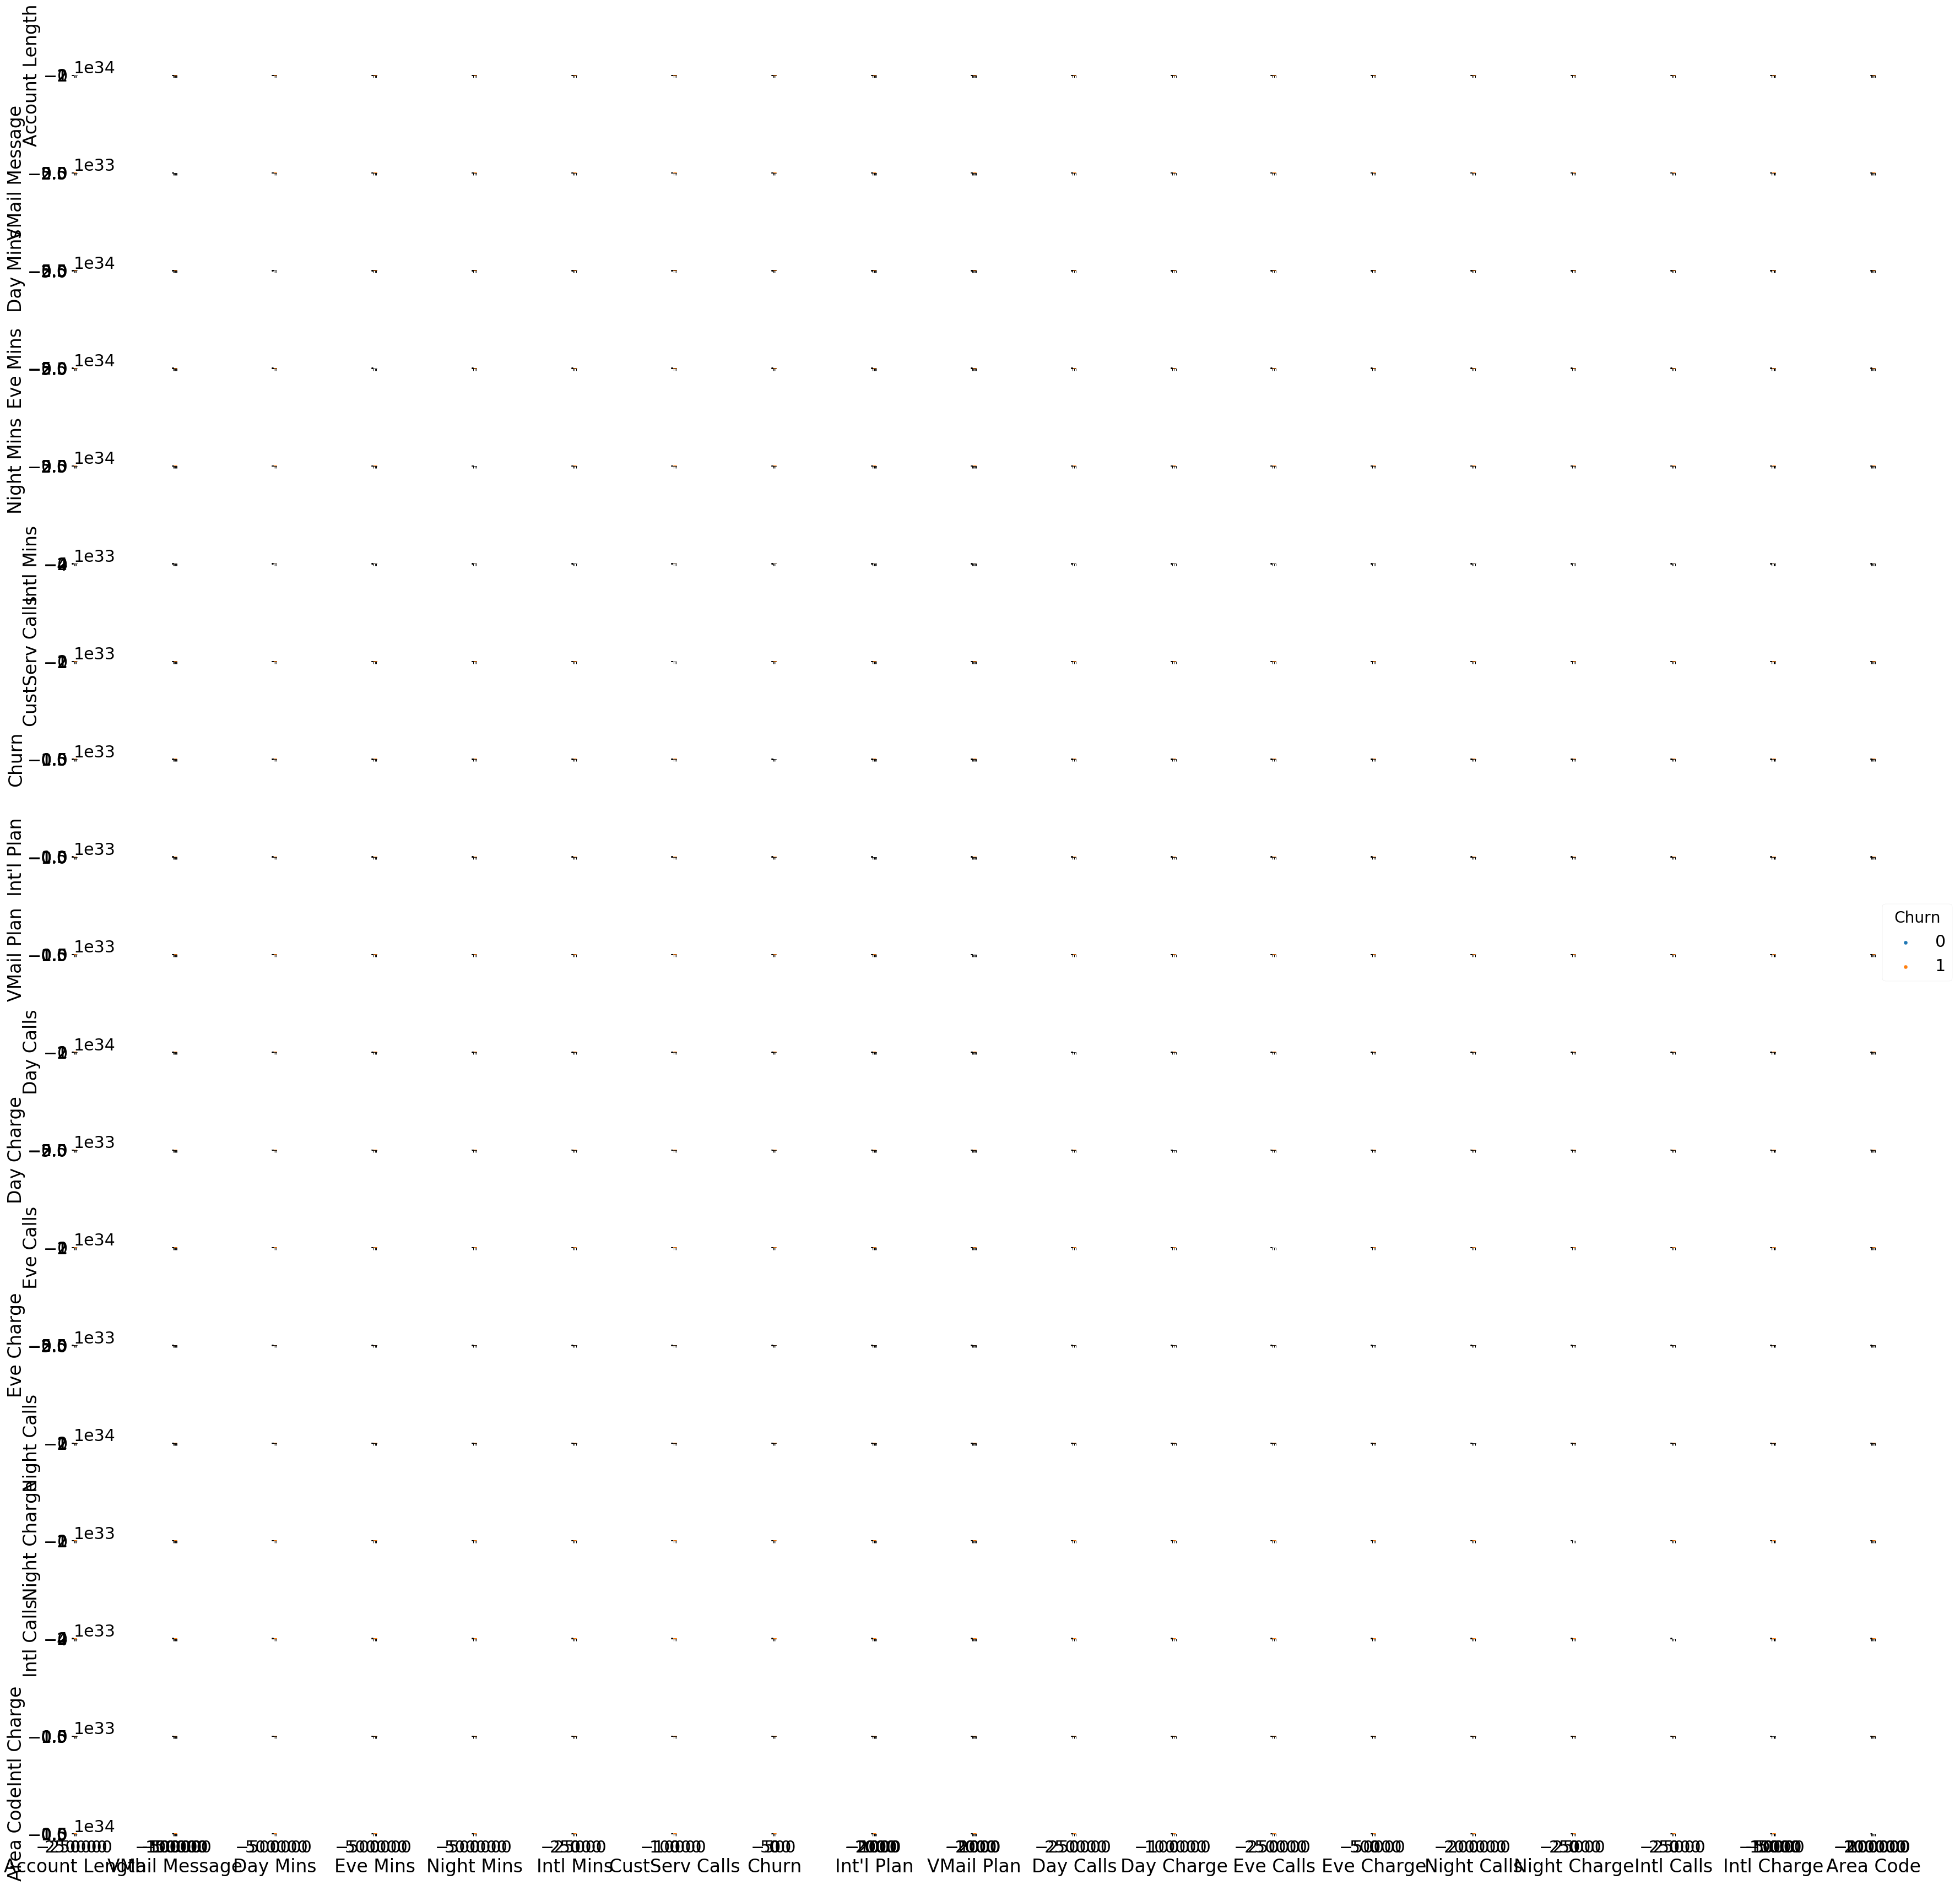

In [19]:
se.pairplot(df, hue= 'Churn')

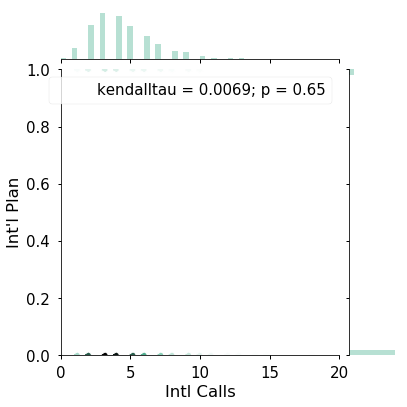

In [22]:
from scipy.stats import kendalltau
se.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
se.jointplot(df['Intl Calls'], df['Int\'l Plan'], kind="hex", stat_func=kendalltau, color="#4CB391")

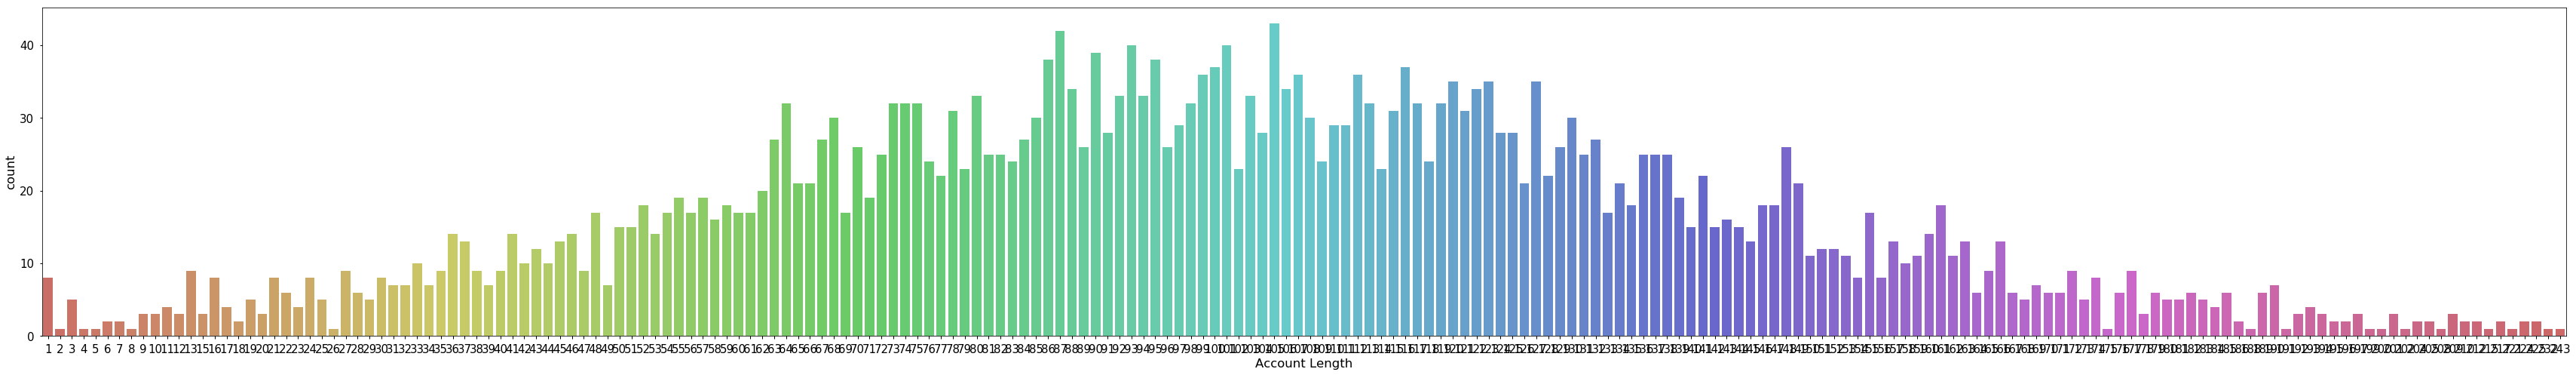

In [23]:
plt.figure(figsize=(60, 8))
se.countplot(x = 'Account Length', data = df, palette = 'hls')

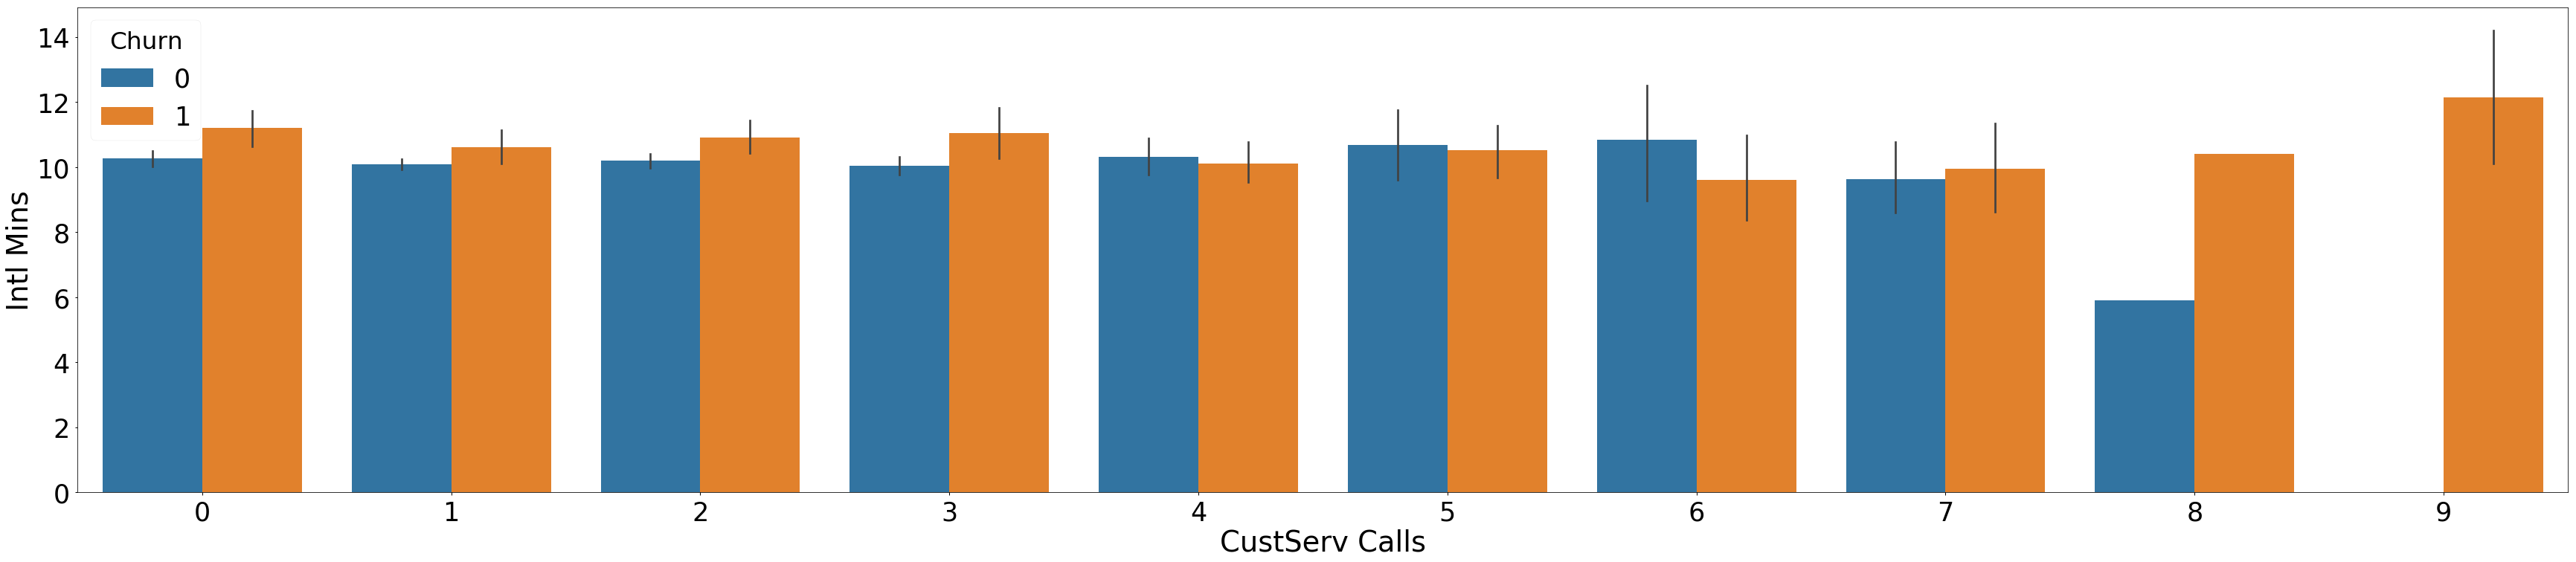

In [25]:
plt.figure(figsize=(60, 12))
se.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 1.5})
se.barplot(x="CustServ Calls", y = 'Intl Mins', hue="Churn", data=df);

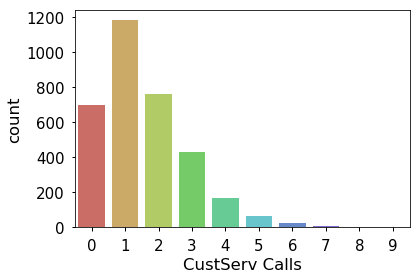

In [28]:
se.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
se.countplot(x = 'CustServ Calls', data = df, palette = 'hls')

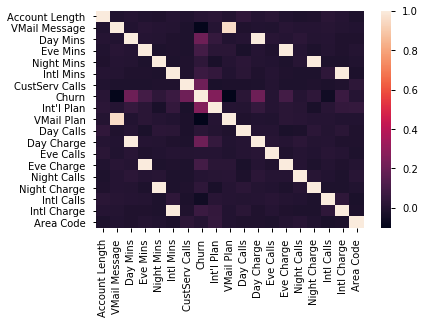

In [32]:
se.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
se.heatmap(df.corr())

In [33]:
short = df.loc[df['Account Length'] < 50]
short.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
28,20,0,190.0,258.2,181.5,6.3,0,0,0,0,...,32.30,84,21.95,102,8.17,6,1.70,MO,415,353-2630
29,49,0,119.3,215.1,178.7,11.1,1,0,0,0,...,20.28,109,18.28,90,8.04,1,3.00,HI,510,410-7789
33,12,0,249.6,252.4,280.2,11.8,1,1,0,0,...,42.43,119,21.45,90,12.61,3,3.19,AZ,408,360-1596
36,36,30,146.3,162.5,129.3,14.5,0,0,0,1,...,24.87,80,13.81,109,5.82,6,3.92,AK,408,341-9764
42,34,0,124.8,282.2,311.5,10.0,2,0,0,0,...,21.22,98,23.99,78,14.02,4,2.70,AR,510,353-7289


In [34]:
short['Account Length'].unique()

array([20, 49, 12, 36, 34, 10, 38, 40, 43, 46, 41,  6, 32, 25, 19, 35, 45,
       22, 33, 24, 48, 16, 39, 44, 31, 37, 21, 11, 18, 30, 47, 26, 28, 13,
       27,  3, 42, 23,  1,  5,  9, 29,  2, 17,  7, 15,  8,  4])

In [35]:
short['Account Length'].max()

49

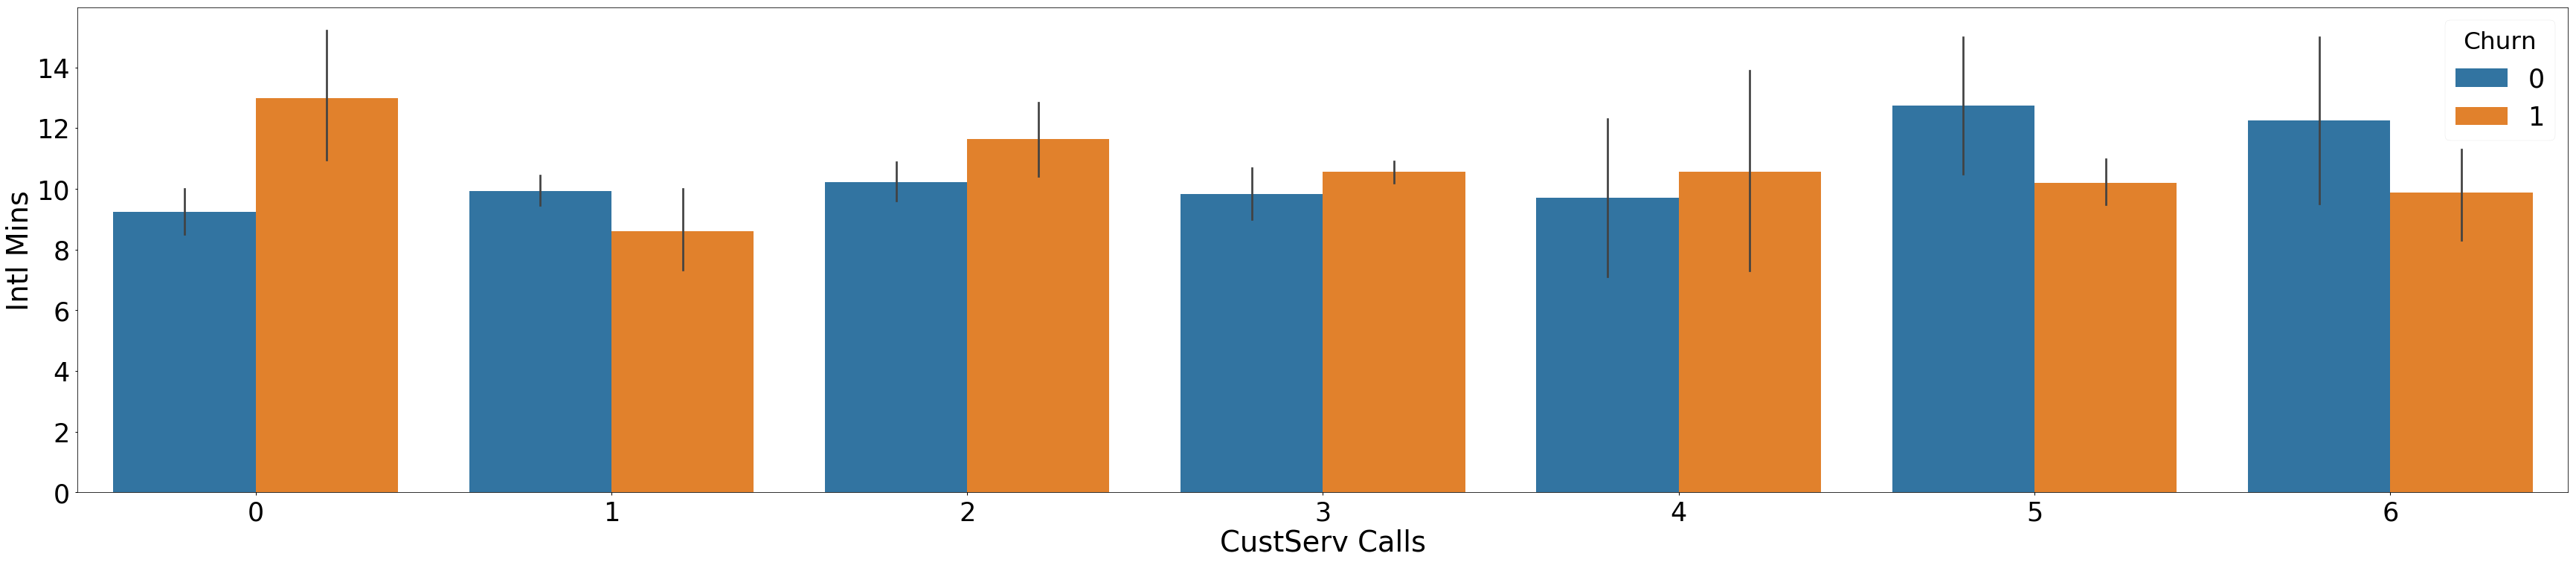

In [36]:
plt.figure(figsize=(60, 12))
se.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 1.5})
se.barplot(x="CustServ Calls", y = 'Intl Mins', hue="Churn", data=short);

In [37]:
df['Total Mins'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins'] + df['Intl Mins']
df['Total Calls'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls'] + df['Intl Calls']
df['Total Charges'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge'] + df['Intl Charge']

In [38]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Total Mins,Total Calls,Total Charges
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,91,11.01,3,2.70,KS,415,382-4657,717.2,303,75.56
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,103,11.45,3,3.70,OH,415,371-7191,625.2,332,59.24
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,104,7.32,5,3.29,NJ,415,358-1921,539.4,333,62.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,89,8.86,7,1.78,OH,408,375-9999,564.8,255,66.80
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,121,8.41,3,2.73,OK,415,330-6626,512.0,359,52.09


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['State'] = encoder.fit_transform(df['State'].astype('str'))

In [43]:
df['State']

0       16
1       35
2       31
3       35
4       36
5        1
6       19
7       24
8       18
9       49
10      15
11      39
12      12
13      26
14      12
15      34
16      13
17      46
18      45
19      43
20       9
21       5
22       3
23      40
24      45
25      29
26      50
27      26
28      24
29      11
        ..
3303    48
3304    14
3305    15
3306     1
3307    36
3308    12
3309    46
3310    34
3311    18
3312    40
3313    13
3314    24
3315    21
3316    25
3317    41
3318    36
3319    50
3320    10
3321    46
3322    20
3323    15
3324    49
3325    35
3326    35
3327    40
3328     3
3329    49
3330    39
3331     6
3332    42
Name: State, Length: 3333, dtype: int64

In [44]:
stringstate = encoder.inverse_transform(df['State'])

In [45]:
stringstate

array(['KS', 'OH', 'NJ', ..., 'RI', 'CT', 'TN'], dtype=object)

In [47]:
df = df.drop(['Phone', 'Area Code'], axis =1)

In [49]:
labels = df['Churn']

df = df.drop(['Churn'], axis = 1)

In [51]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Total Mins,Total Calls,Total Charges
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,16,717.2,303,75.56
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,35,625.2,332,59.24
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,31,539.4,333,62.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,35,564.8,255,66.80
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,36,512.0,359,52.09
5,118,0,223.4,220.6,203.9,6.3,0,1,0,98,...,101,18.75,118,9.18,6,1.70,1,654.2,323,67.61
6,121,24,218.2,348.5,212.6,7.5,3,0,1,88,...,108,29.62,118,9.57,7,2.03,19,786.8,321,78.31
7,147,0,157.0,103.1,211.8,7.1,0,1,0,79,...,94,8.76,96,9.53,6,1.92,24,479.0,275,46.90
8,117,0,184.5,351.6,215.8,8.7,1,0,0,97,...,80,29.89,90,9.71,4,2.35,18,760.6,271,73.32
9,141,37,258.6,222.0,326.4,11.2,0,1,1,84,...,111,18.87,97,14.69,5,3.02,49,818.2,297,80.54


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

In [54]:
from sklearn import tree

DTclf = tree.DecisionTreeClassifier()

DTclf = DTclf.fit(X_train, y_train)

In [55]:
accuracy = DTclf.score(X_train, y_train)

print('Accuracy of DT classifier is:', accuracy*100, "%" )

Accuracy of DT classifier is: 100.0 %


In [57]:
from sklearn.metrics import confusion_matrix
ypredict = DTclf.predict(X_train)
print ("\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict))


 Confusion matrix of training 
 [[2134    0]
 [   0  365]]


In [59]:
from sklearn.metrics import classification_report

print ('\n Training classification report\n', classification_report(y_train, ypredict))


 Training classification report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2134
          1       1.00      1.00      1.00       365

avg / total       1.00      1.00      1.00      2499



In [60]:
accuracy = DTclf.score(X_test, y_test)

print('Accuracy of DT classifier (testing):', accuracy*100, "%" )

Accuracy of DT classifier (testing): 95.5635491607 %


In [61]:
ypredict = DTclf.predict(X_test)
print ("\n Confusion matrix of testing \n", confusion_matrix(y_test, ypredict))
print ('\n Training classification testing report\n', classification_report(y_test, ypredict))


 Confusion matrix of testing 
 [[693  23]
 [ 14 104]]

 Training classification testing report
              precision    recall  f1-score   support

          0       0.98      0.97      0.97       716
          1       0.82      0.88      0.85       118

avg / total       0.96      0.96      0.96       834



In [62]:
from sklearn.svm import LinearSVC

linSVM = LinearSVC()

linSVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [63]:
accuracy = linSVM.score(X_train, y_train)
print('Accuracy of Linear SVM in training is: ', accuracy*100, '%')

ypredict = linSVM.predict(X_train)
print ('\n Training classification report\n', classification_report(y_train, ypredict))
print ("\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict))

Accuracy of Linear SVM in training is:  85.5542216887 %

 Training classification report
              precision    recall  f1-score   support

          0       0.86      1.00      0.92      2134
          1       1.00      0.01      0.02       365

avg / total       0.88      0.86      0.79      2499


 Confusion matrix of training 
 [[2134    0]
 [ 361    4]]


In [64]:
accuracy = linSVM.score(X_test, y_test)
print('Accuracy of DT in testing is: ', accuracy*100, '%')

ypredict = linSVM.predict(X_test)
print ('\n Testing classification report\n', classification_report(y_test, ypredict))
print ("\n Confusion matrix of testing \n", confusion_matrix(y_test, ypredict))

Accuracy of DT in testing is:  85.9712230216 %

 Testing classification report
              precision    recall  f1-score   support

          0       0.86      1.00      0.92       716
          1       1.00      0.01      0.02       118

avg / total       0.88      0.86      0.80       834


 Confusion matrix of testing 
 [[716   0]
 [117   1]]


,importance,labels
20,0.409654,Total Charges
8,0.110645,VMail Plan
6,0.109112,CustServ Calls
16,0.086970,Intl Charge
15,0.068930,Intl Calls
7,0.063763,Int'l Plan
12,0.020078,Eve Charge
9,0.017905,Day Calls
5,0.015456,Intl Mins
10,0.015003,Day Charge


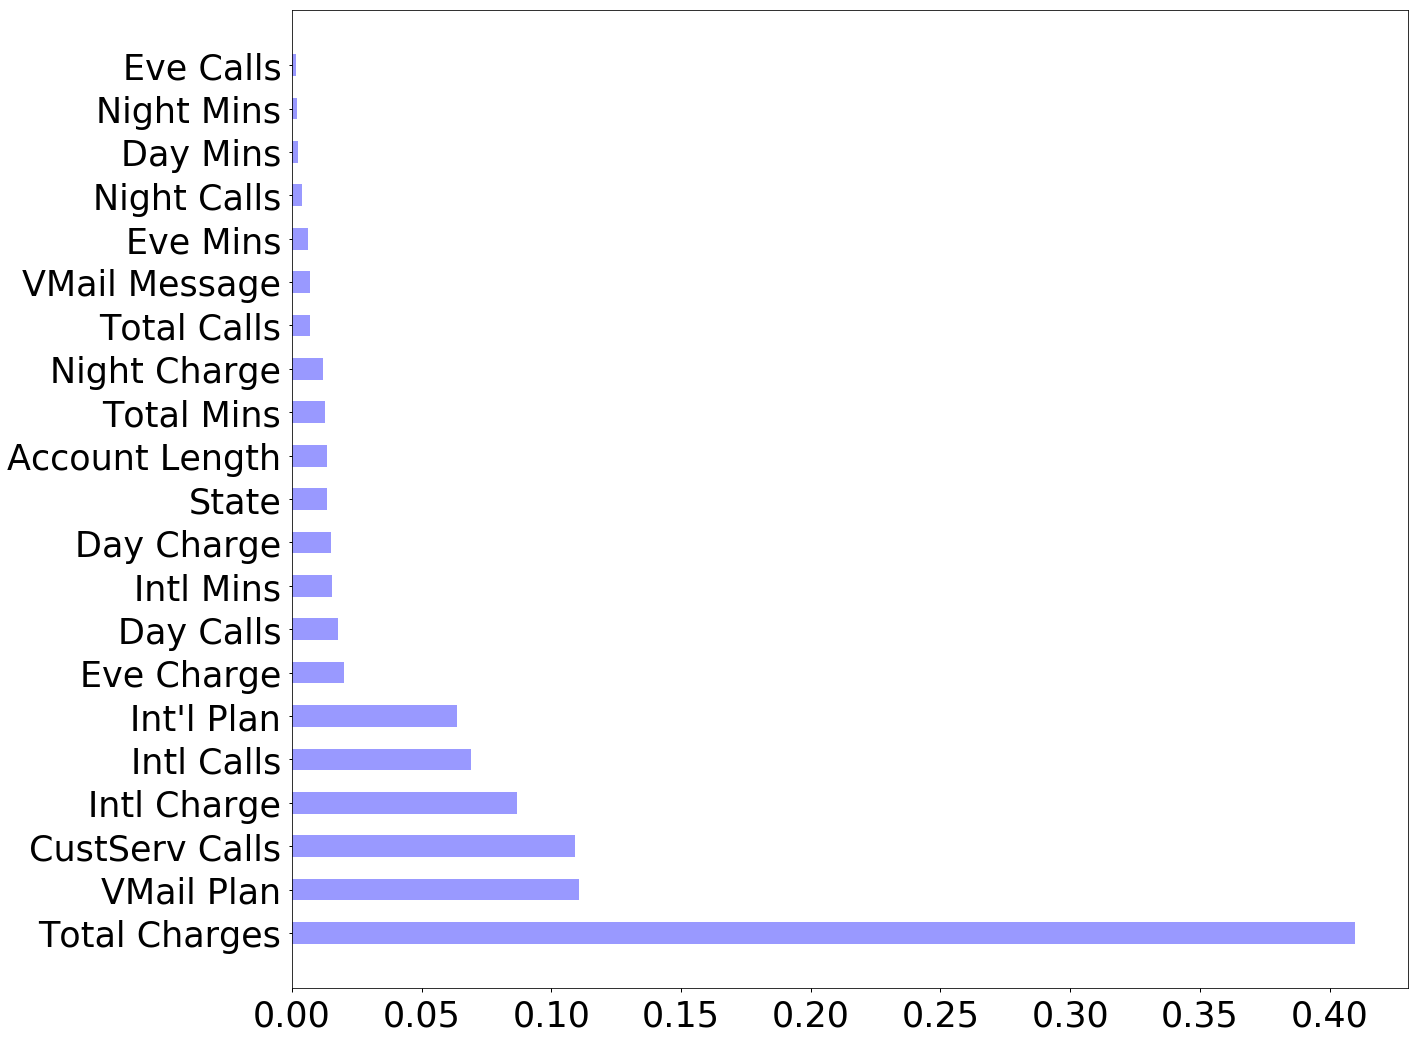

In [65]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(DTclf.feature_importances_, columns=["importance"])
df_f["labels"] = df.columns
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(19))

index = np.arange(len(DTclf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [66]:
from sklearn.externals import joblib
joblib.dump(DTclf, 'DTclf.pkl') 

['DTclf.pkl']

In [67]:
clf = joblib.load('DTclf.pkl') 

In [76]:
clf.predict([df.ix[7]])

array([0])

In [74]:
df.ix[0]

Account Length    128.00
VMail Message      25.00
Day Mins          265.10
Eve Mins          197.40
Night Mins        244.70
Intl Mins          10.00
CustServ Calls      1.00
Int'l Plan          0.00
VMail Plan          1.00
Day Calls         110.00
Day Charge         45.07
Eve Calls          99.00
Eve Charge         16.78
Night Calls        91.00
Night Charge       11.01
Intl Calls          3.00
Intl Charge         2.70
State              16.00
Total Mins        717.20
Total Calls       303.00
Total Charges      75.56
Name: 0, dtype: float64